In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PARAMETERS import *
from scipy import stats

In [3]:
customers_df = pd.read_csv('customers_over_time.csv')
profits_df = pd.read_csv('profits_over_time.csv')
prices_df = pd.read_csv('prices_over_time.csv')

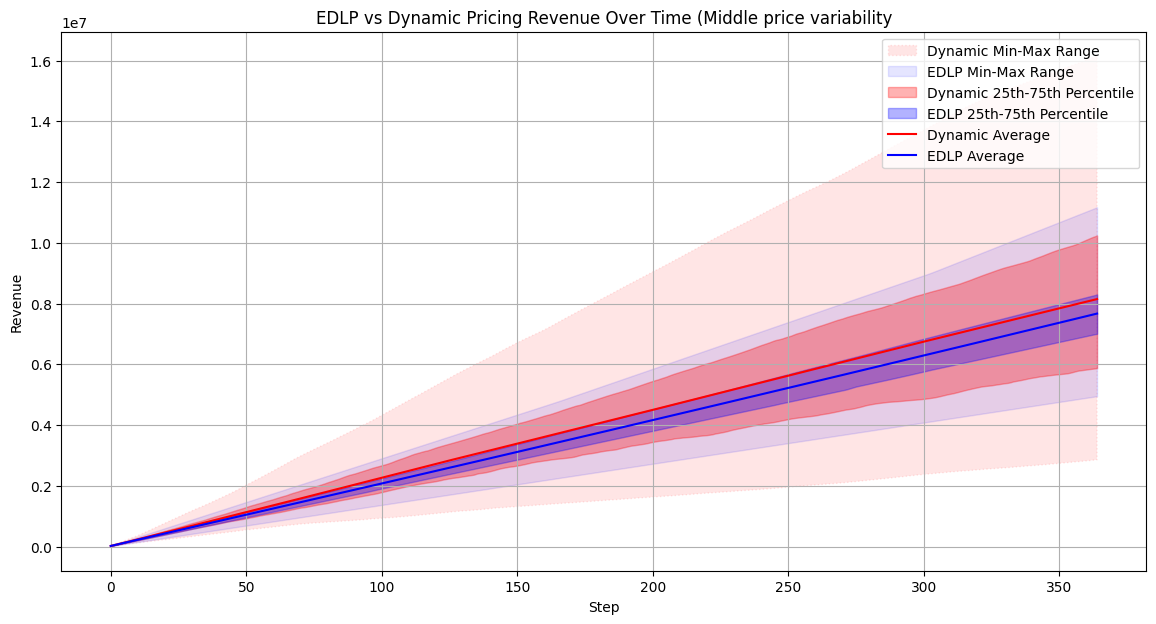

In [4]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = steps

min_profits_EDLP = []
max_profits_EDLP = []
avg_profits_EDLP = []
percentile_25_EDLP = []
percentile_75_EDLP = []

min_profits_Dynamic = []
max_profits_Dynamic = []
avg_profits_Dynamic = []
percentile_25_Dynamic = []
percentile_75_Dynamic = []

for i in range(num_steps):  
    profits_EDLP = []
    profits_Dynamic = []
    
    for j in range(num_simulations):
        index = j * num_steps + i
        profits_EDLP.append(profits_df.iloc[index]['supermarket_EDLP_0'])
        profits_Dynamic.append(profits_df.iloc[index]['supermarket_Dynamic_1'])
    
    min_profits_EDLP.append(np.min(profits_EDLP))
    max_profits_EDLP.append(np.max(profits_EDLP))
    avg_profits_EDLP.append(np.mean(profits_EDLP))
    percentile_25_EDLP.append(np.percentile(profits_EDLP, 25))
    percentile_75_EDLP.append(np.percentile(profits_EDLP, 75))
    
    min_profits_Dynamic.append(np.min(profits_Dynamic))
    max_profits_Dynamic.append(np.max(profits_Dynamic))
    avg_profits_Dynamic.append(np.mean(profits_Dynamic))
    percentile_25_Dynamic.append(np.percentile(profits_Dynamic, 25))
    percentile_75_Dynamic.append(np.percentile(profits_Dynamic, 75))

steps_range = range(num_steps)

plt.figure(figsize=(14, 7))

plt.fill_between(steps_range, min_profits_Dynamic, max_profits_Dynamic, color='red', alpha=0.1, label='Dynamic Min-Max Range', linestyle='dotted')
plt.fill_between(steps_range, min_profits_EDLP, max_profits_EDLP, color='blue', alpha=0.1, label='EDLP Min-Max Range')

plt.fill_between(steps_range, percentile_25_Dynamic, percentile_75_Dynamic, color='red', alpha=0.3, label='Dynamic 25th-75th Percentile')
plt.fill_between(steps_range, percentile_25_EDLP, percentile_75_EDLP, color='blue', alpha=0.3, label='EDLP 25th-75th Percentile')

plt.plot(steps_range, avg_profits_Dynamic, color='red', label='Dynamic Average')
plt.plot(steps_range, avg_profits_EDLP, color='blue', label='EDLP Average', )

plt.title('EDLP vs Dynamic Pricing Revenue Over Time (Middle price variability')
plt.xlabel('Step')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from PARAMETERS import steps

num_steps = steps

average_total_profits_EDLP = []
average_total_profits_Dynamic = []


for i in range(num_steps):  
    total_profit_EDLP = 0
    total_profit_Dynamic = 0
    
    for j in range(num_simulations):
        index = j * num_steps + i
        total_profit_EDLP += profits_df.iloc[index]['supermarket_EDLP_0']
        total_profit_Dynamic += profits_df.iloc[index]['supermarket_Dynamic_1']
    
    average_total_profits_EDLP.append(total_profit_EDLP / num_simulations)
    average_total_profits_Dynamic.append(total_profit_Dynamic / num_simulations)

In [6]:
# eah.g43g

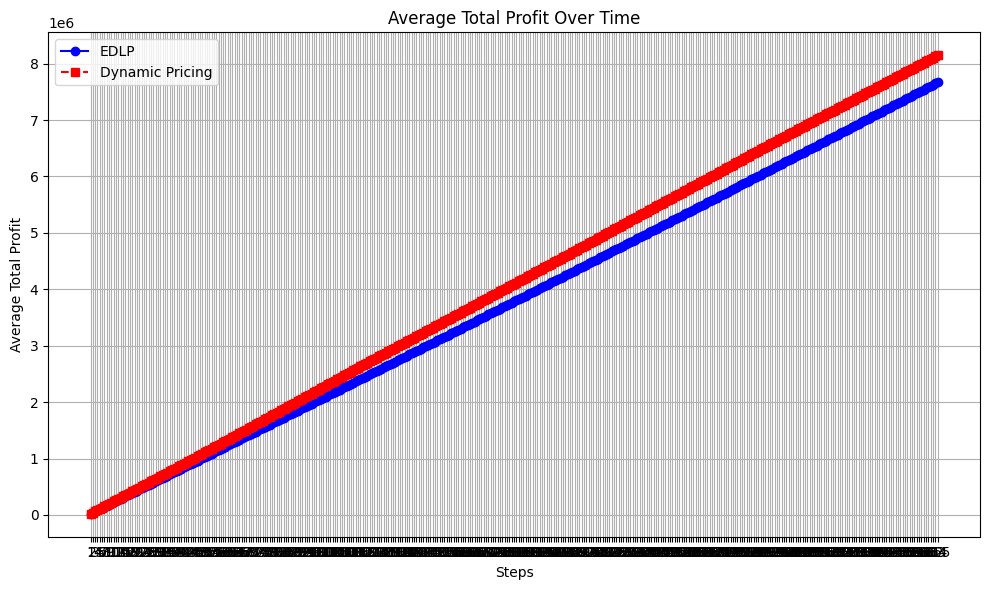

In [7]:
plt.figure(figsize=(10, 6))
steps = range(1, num_steps+1)  

plt.plot(steps, average_total_profits_EDLP, marker='o', linestyle='-', color='b', label='EDLP')
plt.plot(steps, average_total_profits_Dynamic, marker='s', linestyle='--', color='r', label='Dynamic Pricing')

plt.title('Average Total Profit Over Time')
plt.xlabel('Steps')
plt.ylabel('Average Total Profit')
plt.xticks(steps)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
profits_EDLP_last_step = []
profits_Dynamic_last_step = []

for j in range(num_simulations):
    index = (j + 1) * num_steps - 1
    
    profits_EDLP_last_step.append(profits_df.iloc[index]['supermarket_EDLP_0'])
    profits_Dynamic_last_step.append(profits_df.iloc[index]['supermarket_Dynamic_1'])

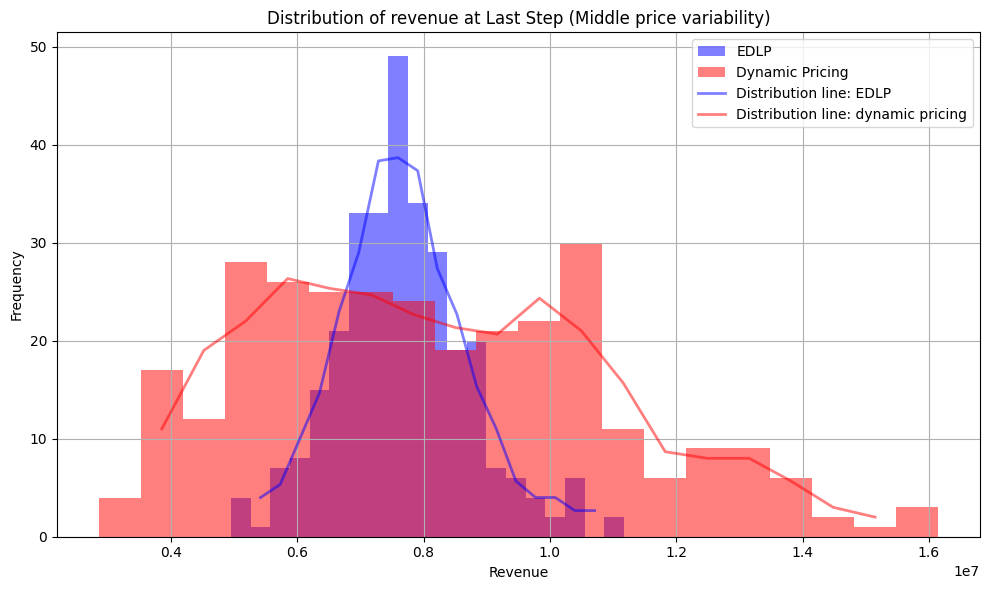

In [9]:
plt.figure(figsize=(10, 6))

counts_EDLP, bins_EDLP, _ = plt.hist(profits_EDLP_last_step, bins=20, alpha=0.5, color='blue', label='EDLP')
counts_Dynamic, bins_Dynamic, _ = plt.hist(profits_Dynamic_last_step, bins=20, alpha=0.5, color='red', label='Dynamic Pricing')

bin_centers_EDLP = (bins_EDLP[:-1] + bins_EDLP[1:]) / 2
bin_centers_Dynamic = (bins_Dynamic[:-1] + bins_Dynamic[1:]) / 2

rolling_window_size = 3  
smooth_counts_EDLP = pd.Series(counts_EDLP).rolling(window=rolling_window_size, center=True).mean()
smooth_counts_Dynamic = pd.Series(counts_Dynamic).rolling(window=rolling_window_size, center=True).mean()

plt.plot(bin_centers_EDLP, smooth_counts_EDLP, color='blue', linestyle='-', linewidth=2, alpha = 0.5, label="Distribution line: EDLP")
plt.plot(bin_centers_Dynamic, smooth_counts_Dynamic, color='red', linestyle='-', linewidth=2, alpha = 0.5, label="Distribution line: dynamic pricing")


plt.title('Distribution of revenue at Last Step (Middle price variability)')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import mannwhitneyu




# profits_EDLP_last_step = [profits_df.iloc[i * num_steps + last_step_index]['supermarket_EDLP_0'] for i in range(len(profits_df) // num_steps)]
# profits_Dynamic_last_step = [profits_df.iloc[i * num_steps + last_step_index + 1]['supermarket_Dynamic_1'] for i in range(len(profits_df) // num_steps)]

# print(len(profits_Dynamic_last_step))


statistic, p_value = mannwhitneyu(profits_EDLP_last_step, profits_Dynamic_last_step, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant difference between EDLP and Dynamic pricing strategies.")
else:
    print("There is no significant difference between EDLP and Dynamic pricing strategies.")


Mann-Whitney U statistic: 42234.0
P-value: 0.19271671651197309
There is no significant difference between EDLP and Dynamic pricing strategies.


In [13]:
# Perform paired t-test
t_stat, p_value = stats.ttest_rel(profits_EDLP_last_step, profits_Dynamic_last_step)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Determine significance
alpha = 0.05 
if p_value < alpha:
    print("There is a significant difference between EDLP and Dynamic pricing profits.")
else:
    print("There is no significant difference between EDLP and Dynamic pricing profits.")


t-statistic: -2.4965933899664354
p-value: 0.013077382901136797
There is a significant difference between EDLP and Dynamic pricing profits.
